In [11]:
import numpy as np
from scipy import stats
import traceback


In [9]:

def ci_radius(x, alpha=0.1):
    return stats.t.ppf(1-alpha/2, len(x)-1) * stats.sem(x)



def run_paired_ttest(outputs, alternative='less', conf_level=0.9):

    # t_crit_val = {
    #     0.9: 1.28,
    #     0.95: 1.65,
    # }
    try:
        diff = [
            y - x 
            for x,y 
            in zip(*outputs)
        ]

        # ci = ci_radius(diff)
        # t_crit_val[conf_level] * sem(diff)
        # perform t-test
        result = stats.ttest_1samp(diff, 0, alternative=alternative)

        ci = result.confidence_interval(conf_level)
        mean = sum(diff)/len(diff)
        ci_width = ci.high - mean if alternative == 'less' else mean - ci.low

        ttest = {"t": result.statistic, "p": result.pvalue, "ci_width": ci_width, "ci_high": ci.high, "ci_low": ci.low}
        return ttest
    except Exception as e:
        return traceback.format_exc()

In [ ]:
for name, grp in df.groupby(config_vars_tmp):
    # grp1 = grp[grp[diff_var] == False]['bon_outputs'].values
    # grp2= grp[grp[diff_var] == True]['bon_outputs'].values
    # grp1 = grp[grp[diff_var] == ('french', 'translate_interpretative')]['bon_outputs'].values
    # grp2= grp[grp[diff_var] == ('french', 'translate_interpretative', 'homework', 'stackexchange_repeat_question')]['bon_outputs'].values
    grp1 = np.repeat(grp[grp[diff_var] == '[2] 3 exs']['bon_outputs'].values, 3)
    grp2= np.repeat(grp[grp[diff_var] == '[2] 6 exs']['bon_outputs'].values, 3)
    print()
    if len(grp1) == 0 or len(grp2) == 0:
        continue
    print('\n',name)
    print(grp1.mean().round(2), grp2.mean().round(2), (grp2.mean().round(2) - grp1.mean().round(2)).round(2))
    print([x-y for x,y in zip(*[grp1.astype(int), grp2.astype(int)])])
    ttest_results = run_paired_ttest([grp1.astype(int), grp2.astype(int)], alternative='greater')
    print(ttest_results)
    print(len(grp1))
    print('CIS',
              round(ttest_results['ci_width'], 3) ,
          round(ci_radius(grp1), 3) ,round(ci_radius(grp2), 3))
    print('ratio of normal CI widths to new CI widths', 
          round(
              round(ttest_results['ci_width'], 3) 
           /
          ((round(ci_radius(grp1), 3) + round(ci_radius(grp2), 3)) / 2)
          , 3)
          )

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
n = 10
p_diff = 0.1
p = 0.6
q = p + p_diff
disagreement = 0

# p_grid = {
#     (0,0):, 
#        (1,1):,
#        (0,1):,
#        (1,0):, }

np.random.seed(3)

# simulate n draws of bernoulli random variables with probability p
# of success
a = np.random.binomial(1, p, size=n)

b = np.random.binomial(1, p + p_diff, size=n)

print(f'A mean: {a.mean():.2f} radius: {ci_radius(a):.2f}', )
print(f'B mean: {b.mean():.2f} radius: {ci_radius(b):.2f}', )




A mean: 0.70 radius: 0.28
B mean: 1.00 radius: 0.00


In [28]:
from math import floor

In [50]:
p+q

1.2999999999999998

In [76]:
E_a = floor(n*p)
E_b = floor(n*q)

a = [1] * E_a + [0] * (n-E_a)
dis_max = round((p+q)-1, 4)
dis_min = round(q-p, 4)
dis_interp = 1
dis = (dis_min + (dis_max-dis_min)*dis_interp)
n_dis = floor((dis_min + (dis_max-dis_min)*dis_interp) * n)
n_dis_cancel = n_dis - floor(n*dis_min)

print('E_a:', E_a, 'E_b:', E_b)
print('Maximum disagreement:', (p+q)-1, 'Min disagreement:', q-p)
print('dis', dis, 'n_dis:', n_dis, 'dis cancel', n_dis_cancel)
assert n_dis_cancel % 2 == 0
diff = [1] * (n_dis_cancel//2) + [-1] * (n_dis_cancel//2) + [1] * (n_dis - n_dis_cancel) + [0] * (n-n_dis)

# b = [ai + diffi for ai, diffi in zip(a, diff)]

E_a: 6 E_b: 7
Maximum disagreement: 0.2999999999999998 Min disagreement: 0.09999999999999998
dis 0.3 n_dis: 3 dis cancel 2


In [ ]:
for d in diff:

In [77]:
a, diff

([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, -1, 1, 0, 0, 0, 0, 0, 0, 0])

In [114]:
# p_grid = {
#         (0,0):, 
#        (1,1):,
#        (0,1):,
#        (1,0):, }


def sample_joint_bernoulli(p, q, corr, n_samples=1000):
    # Compute joint probability P(A=1, B=1)

    cov = corr * np.sqrt(p * q * (1 - p) * (1 - q))
    p_11 = cov + p * q
    # print(p_11)
    
    # Error check
    if p_11 < 0 or p_11 > min(p, q):
        raise ValueError("Invalid covariance for given p and q.")

    # Compute other joint probabilities
    p_10 = p - p_11
    p_01 = q - p_11
    p_00 = 1 - p_11 - p_10 - p_01

    # List of joint probabilities
    joint_probs = [p_00, p_01, p_10, p_11]
    # print(joint_probs)

    # Sample from joint distribution
    samples = np.random.choice(4, size=n_samples, p=joint_probs)
    mp = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}
    return [mp[x] for x in samples]

In [134]:
p_diff = 0.1
p = 0.6
q = p + p_diff
corr = 0.8
n=50
np.random.seed(3)
a, b = zip(*sample_joint_bernoulli(p, q, corr, n_samples=n))
print(run_paired_ttest([a,b])['ci_width'])
print(stats.sem(a))
print(stats.sem(b))

0.05034693238467407
0.07050835816716038
0.0676726816132972


In [173]:

results = []
for p in np.linspace(0.2, 0.8, 4):
    for diff in np.linspace(0, 0.15, 4):
        q = p + diff
        for corr in np.linspace(0, 0.9, 5):
            try:
                np.random.seed(3)
                a, b = zip(*sample_joint_bernoulli(p, q, corr, n_samples=n))
                # print(run_paired_ttest([a,b])['ci_width'])
                # print(run_paired_ttest([a,b])['ci_width'])
                # print(stats.sem(a))
                # print(stats.sem(b))
                ci_width = run_paired_ttest([a,b])['ci_width']
                ci_a = stats.sem(a)
                ci_b = stats.sem(b)
                ratio = ci_width / ((ci_a + ci_b)/2)
                results.append((p, diff, corr, ci_width, ci_a, ci_b, ratio))
            except:
                results.append((p, diff, corr, np.nan, np.nan, np.nan, np.nan))

df = pd.DataFrame(results, columns=['p', 'diff','corr', 'ci_width', 'sem_a', 'sem_b', 'ratio'])

/Users/milesturpin/miniconda3/envs/sita-reward-hacking/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6742: RuntimeWarning: invalid value encountered in scalar multiply
  low = low * self._standard_error + self._estimate


In [174]:
df.round(3).set_index(['p', 'diff', 'corr'])['ratio'].unstack()

corr      0.000  0.225  0.450  0.675  0.900
p   diff                                   
0.2 0.00  1.855  1.639  0.944  0.749  0.000
    0.05  1.855  1.735  1.149  0.510    NaN
    0.10  1.894  1.618  1.262  0.826    NaN
    0.15  1.866  1.461  1.133  1.133    NaN
0.4 0.00  1.840  1.744  1.497  1.264  0.556
    0.05  1.840  1.732  1.655  1.146  0.834
    0.10  1.862  1.780  1.549  1.008    NaN
    0.15  1.942  1.780  1.458  1.203    NaN
0.6 0.00  2.039  1.941  1.675  1.199  0.744
    0.05  2.080  1.925  1.685  1.053    NaN
    0.10  2.069  1.863  1.781  1.291    NaN
    0.15  1.988  1.879  1.674  1.338    NaN
0.8 0.00  1.821  1.716  1.523  1.052  0.541
    0.05  1.821  1.641  1.220  0.944    NaN
    0.10  1.970  1.553  1.385    NaN    NaN
    0.15  1.940  1.681  1.353    NaN    NaN

In [ ]:
p_diff = 0.1
p = 0.6
q = p + p_diff
corr = 0.2
n=50

a, b = zip(*sample_joint_bernoulli(p, q, corr, n_samples=n))

print(run_paired_ttest([a,b])['ci_width'])
print(stats.sem(a))
print(stats.sem(b))

0.1111010357368184
0.06857142857142857
0.06663945022680343


0.08504401482810126
0.07119963311072636
0.05237229365663817


In [105]:
def max_correlation(p, q):
    # Compute the potential maximum and minimum correlations
    rho_1 = (-p*q) / ((p*(1-p)*q*(1-q))**0.5)
    rho_2 = (min(p, q) - p*q) / ((p*(1-p)*q*(1-q))**0.5)
    
    # Return the maximum absolute value of the correlations
    return max(abs(rho_1), abs(rho_2))

# Example:
p = 0.3
q = 0.6
print(max_correlation(p, q))

0.8017837257372732


In [106]:
import pandas as pd
df = []
for p in np.linspace(0.1,0.9,9):
    for q in np.linspace(0.1,0.9,9):
        df.append({'p':p, 'q':q, 'corr_max': max_correlation(p,q)}, )

df = pd.DataFrame.from_dict(df).set_index(['p','q'])
        

In [107]:
df.unstack().round(1)

corr_max                                        
q        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
p                                                   
0.1      1.0  0.7  0.5  0.4  0.3  0.4  0.5  0.7  1.0
0.2      0.7  1.0  0.8  0.6  0.5  0.6  0.8  1.0  1.5
0.3      0.5  0.8  1.0  0.8  0.7  0.8  1.0  1.3  2.0
0.4      0.4  0.6  0.8  1.0  0.8  1.0  1.2  1.6  2.4
0.5      0.3  0.5  0.7  0.8  1.0  1.2  1.5  2.0  3.0
0.6      0.4  0.6  0.8  1.0  1.2  1.5  1.9  2.4  3.7
0.7      0.5  0.8  1.0  1.2  1.5  1.9  2.3  3.1  4.6
0.8      0.7  1.0  1.3  1.6  2.0  2.4  3.1  4.0  6.0
0.9      1.0  1.5  2.0  2.4  3.0  3.7  4.6  6.0  9.0

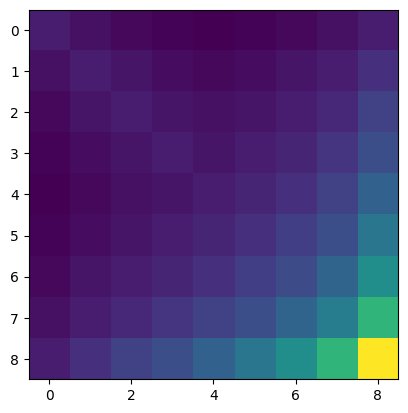

In [108]:
plt.imshow(df.unstack().round(1))